# Обработка отсутствующих данных. Масштабирование данных

## Что мы изучим на этом занятии

* Зачем нужна предобработка данных?
* Обработка отсутствующих данных
    * Просмотр отсутствующих данных
    * Удаление строк
    * Удаление столбцов
    * Замена пропущенных значений (imputation)
* Масштабирование данных (Scaling)
    * Причины для масштабирования данных
    * Виды масштабирования
    * Нормализация (Min-max scaling)
    * Стандартизация (Standardization)
    * Масштабирование, устойчивое к выбросам (Robust Scaling)

## Зачем нужна предобработка данных?

Это ключевой этап в процессе анализа данных и машинного обучения. Он включает в себя подготовку и очистку данных перед тем, как они будут использоваться для построения моделей или анализа.

Предобработка данных критична для создания надежных, точных и эффективных аналитических моделей и алгоритмов машинного обучения. Она помогает обеспечить, что данные корректны, полны и готовы к анализу или построению модели.

## Обработка отсутствующих данных

Как мы уже поняли, модели машинного обучения часто не могут работать с данными, в которых встречаются отсутствующие значения.

Существуют насколько способов обработки отсутствующих данных:

1. Удаление строк или столбцов
2. Замена пропущенных значений (imputation)
    * Средним значением
    * Модой (самым популярным значением)
    * Постоянным значением
    * Продвинутые техники: Метод ближайших соседей (KNN), Регрессия

Чтобы рассмотреть эти два способа обработки отсутствующих данных, загрузим датасет с пропущенными данными

In [ ]:
import pandas as pd

ufo = pd.read_csv("http://bit.ly/uforeports")
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


### Просмотр отсутствующих значений

Уже сейчас мы можем видеть, что в даннх присутствуют пропуски (обозначены как **NaN**)

Но просматривать вручную в каких строках и в каких столбцах отсутствуют данные может быть неэффективно, если данных много. Поэтому Pandas предоставляет возможность автоматически определить эти пропуски.

Функция `isnull` позволяет создать таблицу, похожую на исходную таблицу, где пропущенные данные будут отмечены как True, а присутствующие данные как False:

In [ ]:
ufo.isnull()

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False
...,...,...,...,...,...
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False


Также можно посмотреть сколько пропущенных значений содержит каждый столбец:

In [ ]:
ufo.isnull().sum()

City                  26
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

Можем взглянуть на строки, в которых отсутствует записи в конкретном столбце (например, в столбце City):

In [ ]:
ufo[ufo.City.isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


### Удаление строк

Удаление всех строк, в которых есть хотя бы одно отсутствующее значение

In [ ]:
ufo.dropna(axis=0, how='any')

,City,Colors Reported,Shape Reported,State,Time
12,Belton,RED,SPHERE,SC,6/30/1939 20:00
19,Bering Sea,RED,OTHER,AK,4/30/1943 23:00
36,Portsmouth,RED,FORMATION,VA,7/10/1945 1:30
44,Blairsden,GREEN,SPHERE,CA,6/30/1946 19:00
82,San Jose,BLUE,CHEVRON,CA,7/15/1947 21:00
...,...,...,...,...,...
18213,Pasadena,GREEN,FIREBALL,CA,12/28/2000 19:10
18216,Garden Grove,ORANGE,LIGHT,CA,12/29/2000 16:10
18220,Shasta Lake,BLUE,DISK,CA,12/29/2000 20:30
18233,Anchorage,RED,VARIOUS,AK,12/31/2000 21:00


Удаление всех строк, в которых все значения отсутствуют

In [ ]:
ufo.dropna(axis=0, how='all')

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


### Удаление столбцов

Удаление всех столбцов, в которых все значения отсутствуют

In [ ]:
ufo.dropna(axis=1, how='all')

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


Удаление столбцов, в которых есть хотя бы одно отсутствующее значение:

In [ ]:
ufo.dropna(axis=1, how='any')

,State,Time
0,NY,6/1/1930 22:00
1,NJ,6/30/1930 20:00
2,CO,2/15/1931 14:00
3,KS,6/1/1931 13:00
4,NY,4/18/1933 19:00
...,...,...
18236,IL,12/31/2000 23:00
18237,IA,12/31/2000 23:00
18238,WI,12/31/2000 23:45
18239,WI,12/31/2000 23:45


### Замена пропущенных значений (imputation)

Замена конкретным значением

In [ ]:
!pip install scikit-learn

In [ ]:
# Импортируем класс SimpleImputer из библиотеки scikit-learn
from sklearn.impute import SimpleImputer

# Создаем экземпляр SimpleImputer с заполнением пропущенных значений фиксированным значением "Unknown" и стратегией 'constant'
imputer = SimpleImputer(fill_value="Unknown", strategy='constant')

# Применяем импьютер к данным ufo, заменяя пропущенные значения на "Unknown" и преобразуем данные
imputed_arr = imputer.fit_transform(ufo)

# Преобразуем массив с заполненными значениями обратно в DataFrame и возвращаем его с исходными названиями столбцов
pd.DataFrame(imputed_arr, columns=ufo.columns)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,Unknown,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,Unknown,OTHER,NJ,6/30/1930 20:00
2,Holyoke,Unknown,OVAL,CO,2/15/1931 14:00
3,Abilene,Unknown,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,Unknown,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,Unknown,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,Unknown,DISK,IA,12/31/2000 23:00
18238,Eagle River,Unknown,Unknown,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


Замена средним значением

В данном датасете провести замену средним значением не получится, так как колонки с отсутствующими данными не являются численными. Тем не менее, в целом, замену можно провести следующим образом

```python
# Импортируем класс SimpleImputer из библиотеки scikit-learn
from sklearn.impute import SimpleImputer

# Создаем экземпляр SimpleImputer с заполнением пропущенных значений стратегией 'mean'
imputer = SimpleImputer(strategy='mean')  

# Применяем импьютер к данным ufo, заменяя пропущенные значения на среднее и преобразуем данные
imputed_arr = imputer.fit_transform(ufo)  

# Преобразуем массив с заполненными значениями обратно в DataFrame и возвращаем его с исходными названиями столбцов
pd.DataFrame(imputed_arr, columns=ufo.columns)
```

Замена модой (самым частым значением)

In [ ]:
# Импортируем класс SimpleImputer из библиотеки scikit-learn
from sklearn.impute import SimpleImputer

# Создаем экземпляр SimpleImputer с заполнением пропущенных значений стратегией 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Применяем импьютер к данным ufo, заменяя пропущенные значения на моду и преобразуем данные
imputed_arr = imputer.fit_transform(ufo)

# Преобразуем массив с заполненными значениями обратно в DataFrame и возвращаем его с исходными названиями столбцов
pd.DataFrame(imputed_arr, columns=ufo.columns)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,RED,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,RED,OTHER,NJ,6/30/1930 20:00
2,Holyoke,RED,OVAL,CO,2/15/1931 14:00
3,Abilene,RED,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,RED,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,RED,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,RED,DISK,IA,12/31/2000 23:00
18238,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


## Упражнение 1

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше*

Загрузим датасет `titanic`, который имеет в себе пропущенные значения

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Загрузка датасета
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Посмотрим какие столбцы имеют пропущенные значение и сколько таких они имеют

In [ ]:
# Вывод информации о пропущенных значениях
print("Пропущенные значения до обработки:")
...

Пропущенные значения до обработки:


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Заменим отсутствующие значения `age` средним значением

In [ ]:
# Импортируем класс SimpleImputer из библиотеки scikit-learn
from sklearn.impute import SimpleImputer

# Создаем экземпляр SimpleImputer с заполнением пропущенных значений стратегией 'mean'
...

data['age'] = ...

Заменим отсутствующие значения `deck` самым частым значением

In [ ]:
# Импортируем класс SimpleImputer из библиотеки scikit-learn
from sklearn.impute import SimpleImputer

# Создаем экземпляр SimpleImputer с заполнением пропущенных значений стратегией 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

data['deck'] = ...

Удалим все строки, где есть хотя бы одно пропущенное значение

In [ ]:
data = ...

Посмотрим остались ли ещё пропущенные данные

In [ ]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## Масштабирование данных (Scaling)

Масштабирование данных — это процесс преобразования числовых значений признаков в наборе данных для того, чтобы привести их к единому масштабу.



### Причины для масштабирования данных

1. Масштабирование помогает лучше обучаться моделям (улучшает сходимость, стабильность обучения, скорость обучения)
2. Масштабирование необходимо для корректной работы алгоритмов машинного обучения, основанных на вычислении расстояний

### Виды масштабирования

* Нормализация (Min-max scaling)
* Стандартизация (Standardization)
* Масштабирование, устойчивое к выбросам (Robust Scaling)

### Нормализация (Min-max scaling)

Преобразование данных в диапазон от 0 до 1 или от -1 до 1 по формуле:
$$ x' = \frac{x - min(x)}{max(x) - min(x)} $$

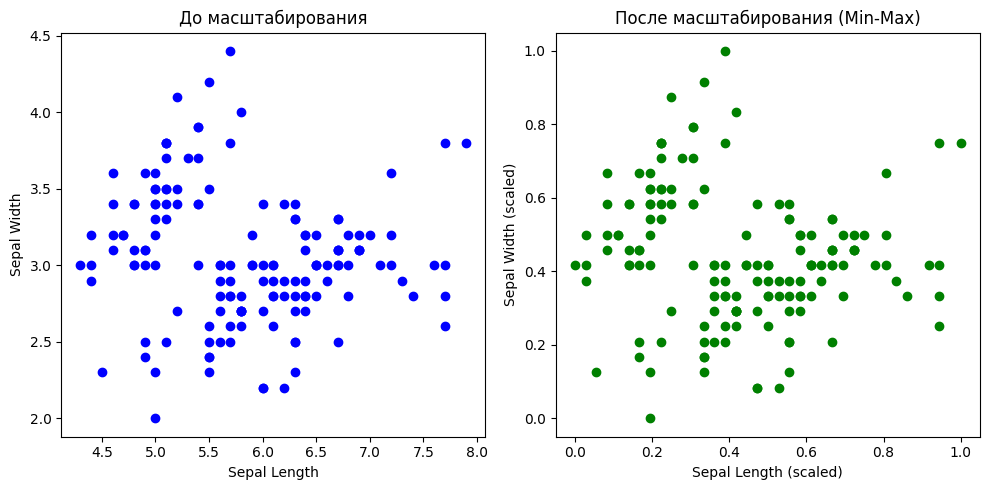

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Загружаем датасет
data = sns.load_dataset('iris')

# Выбираем два признака для примера
features = data[['sepal_length', 'sepal_width']]

# Инициализируем Min-Max масштабатор
scaler = MinMaxScaler()

# Применяем масштабирование
scaled_features = scaler.fit_transform(features)

# График до масштабирования
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(features['sepal_length'], features['sepal_width'], color='blue')
plt.title('До масштабирования')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# График после масштабирования
plt.subplot(1, 2, 2)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], color='green')
plt.title('После масштабирования (Min-Max)')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')

plt.tight_layout()
plt.show()


### Стандартизация (Standardization)

Преобразование данных для получения распределения с нулевым средним значением и единичным стандартным отклонением по формуле:

$$ z = \frac{x - \mu}{\sigma} $$

где $ \mu $ — среднее значение, а $ \sigma $ — стандартное отклонение.

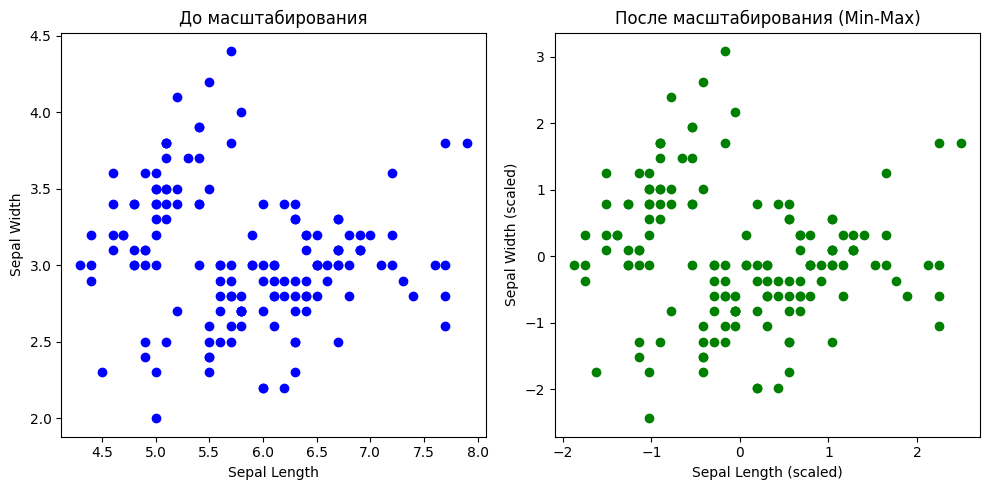

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Загружаем датасет
data = sns.load_dataset('iris')

# Выбираем два признака для примера
features = data[['sepal_length', 'sepal_width']]

# Инициализируем масштабатор
scaler_standard = StandardScaler()

# Применяем масштабирование
scaled_features = scaler_standard.fit_transform(features)

# График до масштабирования
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(features['sepal_length'], features['sepal_width'], color='blue')
plt.title('До стандартизации')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# График после масштабирования
plt.subplot(1, 2, 2)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], color='green')
plt.title('После стандартизации')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')

plt.tight_layout()
plt.show()


### Масштабирование, устойчивое к выбросам (Robust Scaling)

Масштабирование данных с использованием медианы и межквартильного размаха. Устойчив к выбросам. Применяется по формуле:

$$ x' = \frac{x - \text{median}}{\text{IQR}} $$

где IQR — межквартильный размах (разность между третьим и первым квартилями), median - медиана (второй квартиль).

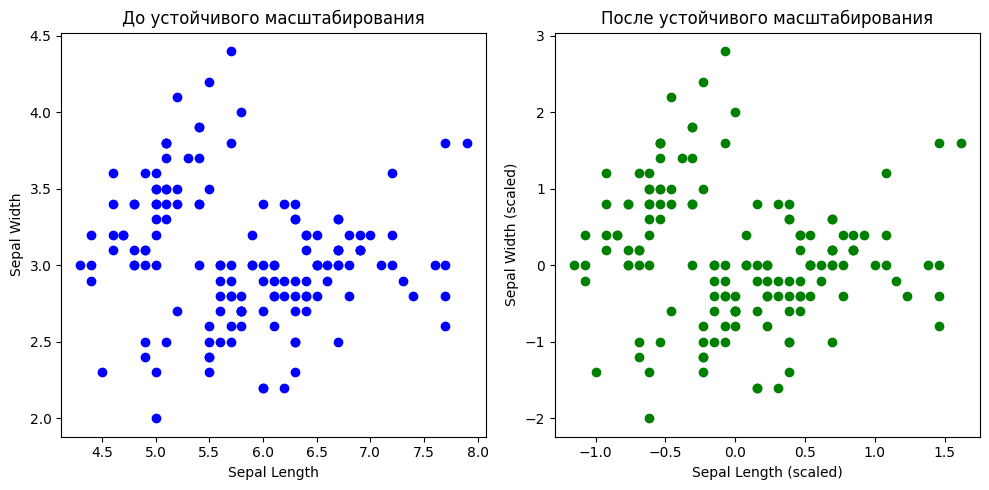

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Загружаем датасет
data = sns.load_dataset('iris')

# Выбираем два признака для примера
features = data[['sepal_length', 'sepal_width']]

# Инициализируем масштабатор
scaler_robust = RobustScaler()

# Применяем масштабирование
scaled_features = scaler_robust.fit_transform(features)

# График до масштабирования
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(features['sepal_length'], features['sepal_width'], color='blue')
plt.title('До устойчивого масштабирования')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# График после масштабирования
plt.subplot(1, 2, 2)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], color='green')
plt.title('После устойчивого масштабирования')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')

plt.tight_layout()
plt.show()


## Упражнение 2

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше*

В этом задании вам нужно использовать устойчивый масштабатор (RobustScaler), чтобы масштабировать численные столбцы датасета `titanic`.

Для начала, загрузим датасет:

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Загрузка датасета
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Удалим строки с отсутствующими данными для корректной работы масштабатора

In [ ]:
# Удаляем строки с отсутствующими данными
data = ...
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


Как мы видим из данных, колонки `survived`, `pclass`, `age`, `sibsp`, `parch`, `fare` являются численными. Запишем их в переменную `features`, чтобы масштабировать их

In [ ]:
numerical_features_names = ...
features = ...
features

,survived,pclass,age,sibsp,parch,fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,0,1,54.0,0,0,51.8625
10,1,3,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542
872,0,1,33.0,0,0,5.0000
879,1,1,56.0,0,1,83.1583
887,1,1,19.0,0,0,30.0000


Создадим RobustScaler масштабатор и масштабируем численные признаки из переменной `features`

In [ ]:
from sklearn.preprocessing import RobustScaler

# Инициализируем масштабатор
scaler_robust = ...

# Применяем масштабирование
scaled_features = ...
scaled_features

array([[ 0.        ,  0.        ,  0.08421053,  1.        ,  0.        ,
         0.23687065],
       [ 0.        ,  0.        , -0.04210526,  1.        ,  0.        ,
        -0.06467662],
       [-1.        ,  0.        ,  0.75789474,  0.        ,  0.        ,
        -0.085199  ],
       ...,
       [ 0.        ,  0.        ,  0.84210526,  0.        ,  1.        ,
         0.43380265],
       [ 0.        ,  0.        , -0.71578947,  0.        ,  0.        ,
        -0.44776119],
       [ 0.        ,  0.        , -0.42105263,  0.        ,  0.        ,
        -0.44776119]])

Посмотрим на данные, которые у нас получились

In [ ]:
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df

,survived,pclass,age,sibsp,parch,fare
0,0.0,0.0,0.084211,1.0,0.0,0.236871
1,0.0,0.0,-0.042105,1.0,0.0,-0.064677
2,-1.0,0.0,0.757895,0.0,0.0,-0.085199
3,0.0,2.0,-1.347368,1.0,1.0,-0.668325
4,0.0,0.0,0.926316,0.0,0.0,-0.504975
...,...,...,...,...,...,...
177,0.0,0.0,0.463158,1.0,1.0,-0.073728
178,-1.0,0.0,-0.126316,0.0,0.0,-0.862355
179,0.0,0.0,0.842105,0.0,1.0,0.433803
180,0.0,0.0,-0.715789,0.0,0.0,-0.447761


## Заключение

На этом занятии мы изучили ключевые методы предобработки данных, такие как обработка отсутствующих значений и масштабирование данных, которые являются важными шагами при работе с данными в контексте машинного обучения и анализа данных.

**Обработка отсутствующих данных**

Мы рассмотрели различные подходы к работе с отсутствующими данными, включая:
- Удаление строк или столбцов с пропусками
- Замена пропущенных значений с использованием среднего, моды или других методов.

Эти методы помогают сделать данные более полными и готовыми к использованию в аналитических моделях.

**Масштабирование данных**

Мы изучили несколько методов масштабирования данных, которые позволяют привести числовые признаки к единому масштабу:
- **Нормализация (Min-max scaling)**: Преобразование данных в диапазон от 0 до 1.
- **Стандартизация (Standardization)**: Приведение данных к нулевому среднему и единичному стандартному отклонению.
- **Устойчивое к выбросам масштабирование (Robust Scaling)**: Масштабирование данных с учетом медианы и межквартильного размаха, что делает этот метод устойчивым к выбросам.